# Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# libraries used to implement models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# libraries to evaluate performance for classification models
import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score


# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

# to set max column display
pd.pandas.set_option('display.max_columns',None)

In [ ]:
! pip install Lightgbm

Defaulting to user installation because normal site-packages is not writeable


# Dataset Loading

In [ ]:
df=pd.read_csv('train_dataset_final1.csv')
df_val=pd.read_csv('validate_dataset_final.csv') # df_val is validation dataset

In [ ]:
df.shape

(25247, 27)

In [ ]:
df_val.shape

(5016, 26)

# Dataset View

In [ ]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [ ]:
#Data Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,25247.0,17640.000000,7288.325459,5017.00,11328.500,17640.00,23951.500,30263.00
marriage,25247.0,1.551907,0.522629,0.00,1.000,2.00,2.000,3.00
sex,25247.0,0.604111,0.489050,0.00,0.000,1.00,1.000,1.00
education,25247.0,1.852101,0.797379,0.00,1.000,2.00,2.000,6.00
LIMIT_BAL,25247.0,168342.060443,129892.784807,10000.00,50000.000,140000.00,240000.000,1000000.00
age,25121.0,35.438199,9.174998,21.00,28.000,34.00,41.000,79.00
pay_0,25247.0,-0.042857,1.099315,-2.00,-1.000,0.00,0.000,8.00
pay_2,25247.0,-0.159544,1.173990,-2.00,-1.000,0.00,0.000,8.00
pay_3,25247.0,-0.190359,1.172636,-2.00,-1.000,0.00,0.000,8.00
pay_4,25247.0,-0.241415,1.146753,-2.00,-1.000,0.00,0.000,7.00


# Changing name of some columns for simplicity and better understanding

In [ ]:
df.rename(columns={'pay_0':'pay_1'},inplace=True)
df_val.rename(columns={'pay_0':'pay_1'},inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,25247.0,17640.000000,7288.325459,5017.00,11328.500,17640.00,23951.500,30263.00
marriage,25247.0,1.551907,0.522629,0.00,1.000,2.00,2.000,3.00
sex,25247.0,0.604111,0.489050,0.00,0.000,1.00,1.000,1.00
education,25247.0,1.852101,0.797379,0.00,1.000,2.00,2.000,6.00
LIMIT_BAL,25247.0,168342.060443,129892.784807,10000.00,50000.000,140000.00,240000.000,1000000.00
age,25121.0,35.438199,9.174998,21.00,28.000,34.00,41.000,79.00
pay_1,25247.0,-0.042857,1.099315,-2.00,-1.000,0.00,0.000,8.00
pay_2,25247.0,-0.159544,1.173990,-2.00,-1.000,0.00,0.000,8.00
pay_3,25247.0,-0.190359,1.172636,-2.00,-1.000,0.00,0.000,8.00
pay_4,25247.0,-0.241415,1.146753,-2.00,-1.000,0.00,0.000,7.00


In [ ]:
#check for any duplicates
len(df[df.duplicated()])

0

Hence no duplicates are present in the data.

In [ ]:
#columns of dataset
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [ ]:
# Checking the sum of null values in columns from a dataset
df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_1                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [ ]:
df_val.isnull().sum()

Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_1                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64

Column 'age' has 126 missing values so we replace them with the meadian of the age , Since median imputation method is robust to outliers and skewed destribution.

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)

In [ ]:
#Check unique values
df.nunique()

Customer_ID           25247
marriage                  4
sex                       2
education                 7
LIMIT_BAL                80
age                      56
pay_1                    11
pay_2                    11
pay_3                    11
pay_4                    10
pay_5                     9
pay_6                    10
Bill_amt1             22374
Bill_amt2             21890
Bill_amt3             21591
Bill_amt4             21277
Bill_amt5             21039
Bill_amt6             20577
pay_amt1              15071
pay_amt2              15466
pay_amt3              14332
pay_amt4              13555
pay_amt5              13241
pay_amt6              13289
AVG_Bill_amt          22519
PAY_TO_BILL_ratio       564
next_month_default        2
dtype: int64

In [ ]:
#  Drop Customer_ID
df.drop(["Customer_ID"], axis=1, inplace= True)

In [ ]:
df = df.drop(['AVG_Bill_amt', 'PAY_TO_BILL_ratio'], axis=1)
#	The columns AVG_Bill_amt and PAY_TO_BILL_ratio have errors. They are not calculated properly.

In [ ]:
df_val= df_val.drop(['AVG_Bill_amt', 'PAY_TO_BILL_ratio'], axis=1)# also drop both the columns from the validation data set

In [ ]:
df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,0
2,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,0
3,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,0


In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'next_month_default'],
      dtype='object')

# for  'education'  feature:


 Education level (1 = Graduate School, 2 = University, 3 = High School, 4 = Others)

  category 5,6 and 0 can also Group into class 4

In [ ]:
df['education'].replace({0:4,5:4,6:4}, inplace=True)
df.education.value_counts()

education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64

In [ ]:
df_val['education'].replace({0:4,5:4,6:4}, inplace=True)
df_val.education.value_counts()

education
2    2374
1    1796
3     760
4      86
Name: count, dtype: int64

# For 'marriage' feature:

Marital status (1=married, 2=single, 3=others)

  We'll group categories 0 into category 3

In [ ]:
df['marriage'].replace({0:3}, inplace=True)
df.marriage.value_counts()

marriage
2    13441
1    11480
3      326
Name: count, dtype: int64

In [ ]:
df_val['marriage'].replace({0:3}, inplace=True)
df_val.marriage.value_counts()

marriage
2    2702
1    2262
3      52
Name: count, dtype: int64

# **EDA (Exploratory Data Analysis)**

# Dependent Variable:

## "next_month_default " Variable

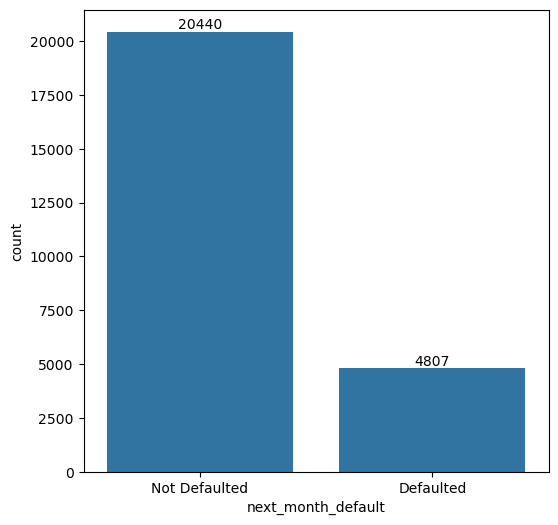

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x=df['next_month_default'])

# Add bar labels
for label in ax.containers:
    ax.bar_label(label)

# Fix the x-axis tick labels
plt.xticks(ticks=[0, 1], labels=["Not Defaulted", "Defaulted"])

plt.xlabel("next_month_default")
plt.ylabel("count")
plt.show()

The data is quite imbalance which about 19.04% of clients will default next month.

# Independent Variable

# Categorical Features

We have few categorical features in our dataset. Let'Check how they are related with out target class.

# **"Sex" variable**

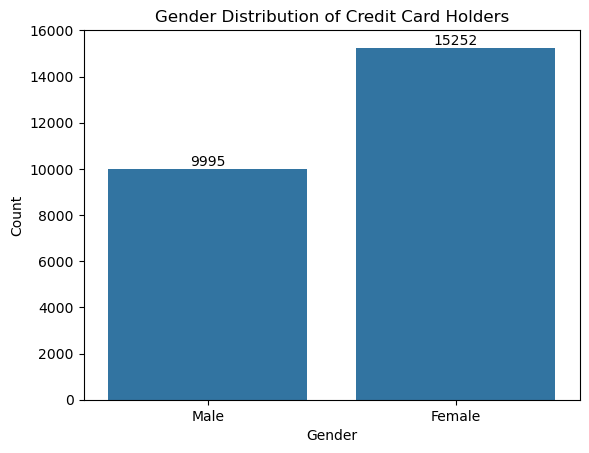

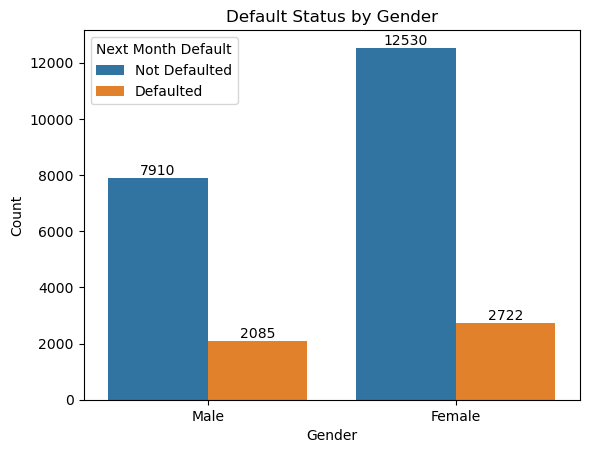

In [ ]:
# First plot: Overall gender distribution
ax = sns.countplot(x=df['sex'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0, 1], labels=["Male", "Female"])
plt.title("Gender Distribution of Credit Card Holders")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Second plot: Gender distribution based on default status
ax = sns.countplot(data=df, x="sex", hue="next_month_default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0, 1], labels=["Male", "Female"])
plt.title("Default Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Next Month Default", labels=["Not Defaulted", "Defaulted"])
plt.show()


More Female clients own credit card than Male client.



20.8% of male clients fraud credit card while the ratio for female is around 17.8%

# "EDUCATION" VARIABLE:

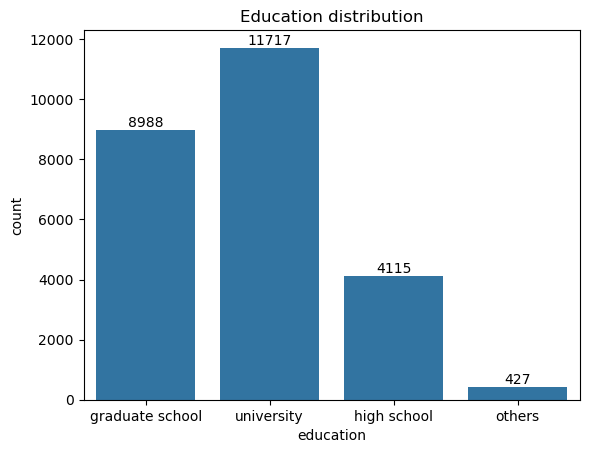

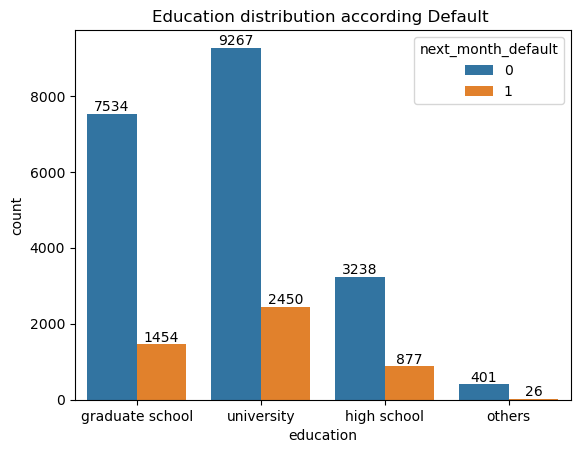

In [ ]:
ax=sns.countplot(x= df['education'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

ax=sns.countplot(data=df, x="education", hue="next_month_default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

University students are the group with the highest number of credit card users (46.4%).

High School students are the group which has highest fraud cases (21.3%) , follow by University student(20.9%)

# "marriage" variable:

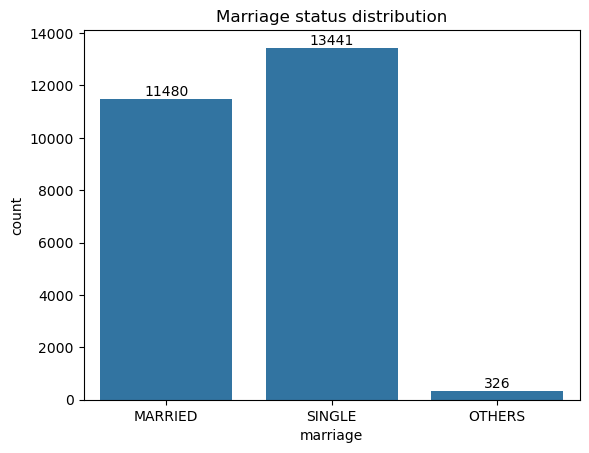

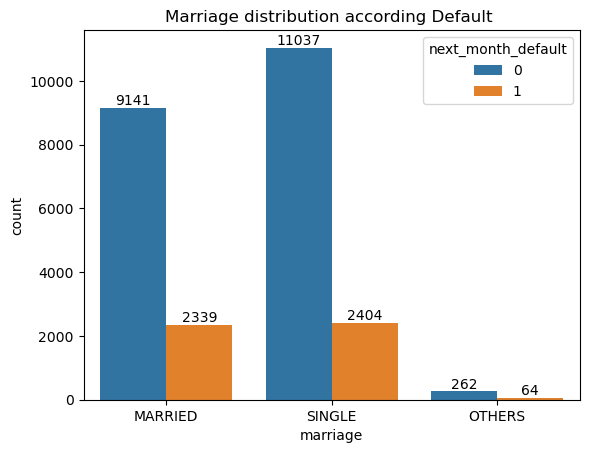

In [ ]:
ax=sns.countplot(x= df['marriage'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

ax=sns.countplot(data=df, x="marriage", hue="next_month_default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")
plt.show()


Single is the group with highest number of customers using credit cards (53%)

Married people are the group which has highest fraud cases(20.3%)

# "AGE" VARIABLE:

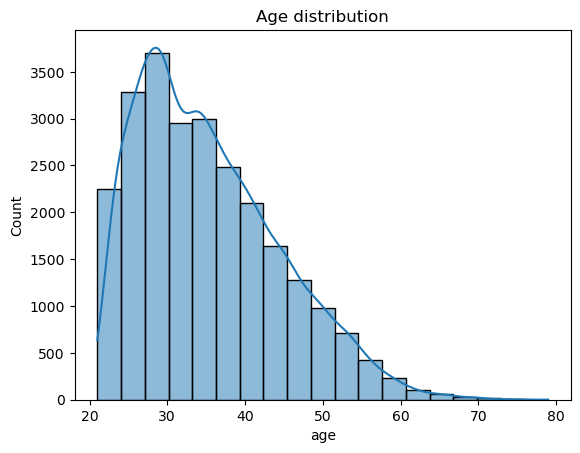

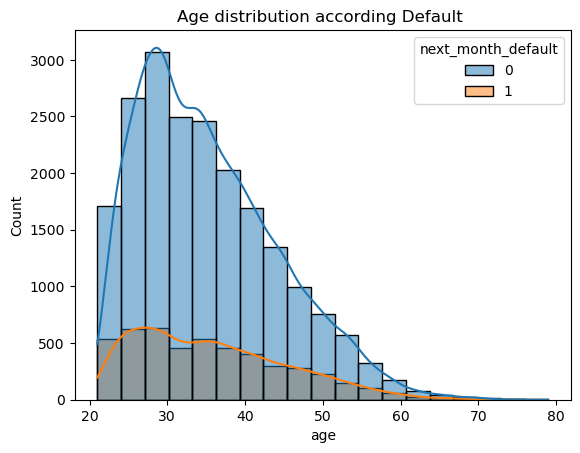

In [ ]:
sns.histplot(data=df, x="age",binwidth=3,kde=True)
plt.title("Age distribution")
plt.show()

sns.histplot(data=df, x="age", hue="next_month_default", binwidth=3,kde=True)
plt.title("Age distribution according Default ")
plt.show()

Histogram is right-skewed meaning the older customers are less likely to use credit cards


The main client is in their 30s


Customers in their 30s are also the most prone to credit fraud

# "LIMIT_BAL" Variable

In [ ]:
sns.displot(df.LIMIT_BAL, kde=True)

In [ ]:
initial_num_var=['LIMIT_BAL', 'age', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',]

In [ ]:

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(initial_num_var):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

Observation:

For numerical features, we can see that the majority of distributions are right-skewed. The distribution of all the bill amounts and pay amounts is highly skewed to the right. It demonstrates that these columns have many outliers.
Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

In [ ]:
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(initial_num_var):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

Observation:

Outliers are visible in the all the bill amounts features and all the pay amounts features, and 'LIMIT_BAL' columns.
Clipping Method: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

# Treating Outliers

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(df):
    for col in df[initial_num_var]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [ ]:

# using the function to treat outliers
df = clip_outliers(df)
df_val=clip_outliers(df_val)

In [ ]:
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(initial_num_var):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

In [ ]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(initial_num_var):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

In [ ]:
# pay_cols = [f'pay_{i}' for i in range(7)]
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]

df['AVG_Bill_amt'] = df[bill_cols].mean(axis=1)
df['Total_Bill'] = df[bill_cols].sum(axis=1)
df['Total_Pay'] = df[pay_amt_cols].sum(axis=1)
df['PAY_TO_BILL_ratio'] = df['Total_Pay'] / (df['Total_Bill'] + 1)

In [ ]:
df_val['AVG_Bill_amt'] = df_val[bill_cols].mean(axis=1)
df_val['Total_Bill'] = df_val[bill_cols].sum(axis=1)
df_val['Total_Pay'] = df_val[pay_amt_cols].sum(axis=1)
df_val['PAY_TO_BILL_ratio'] = df_val['Total_Pay'] / (df['Total_Bill'] + 1)

# Feature Engineering

# Credit utilization vs default rate

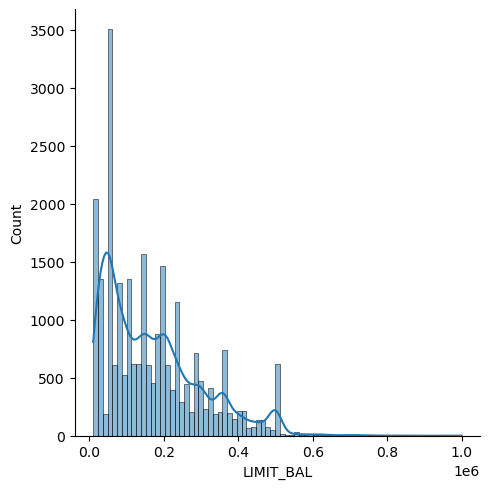

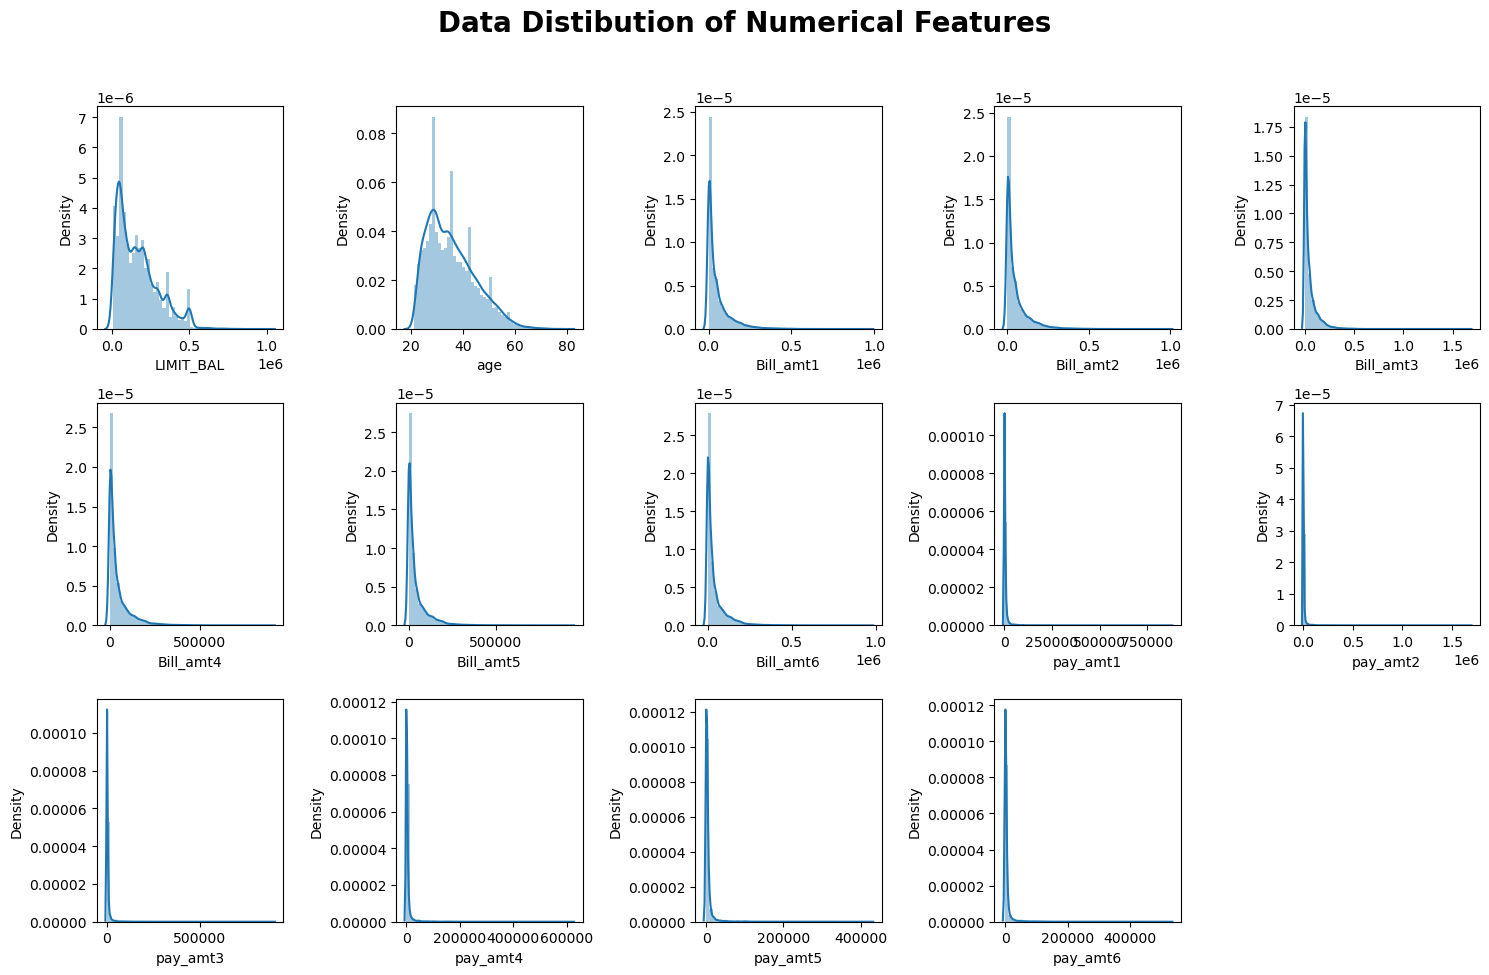

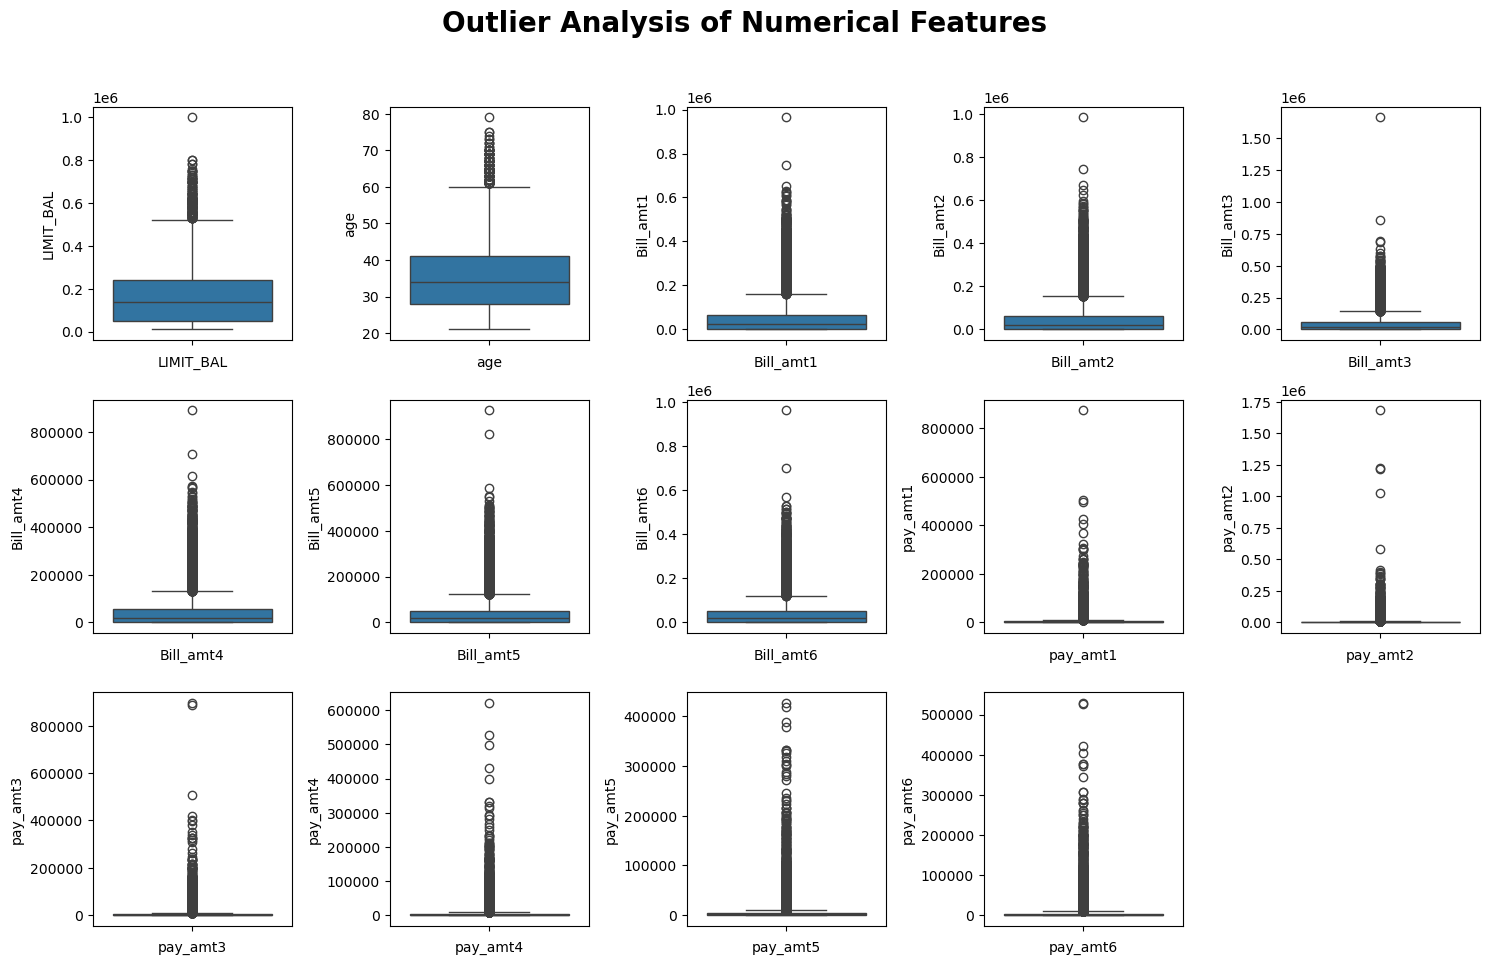

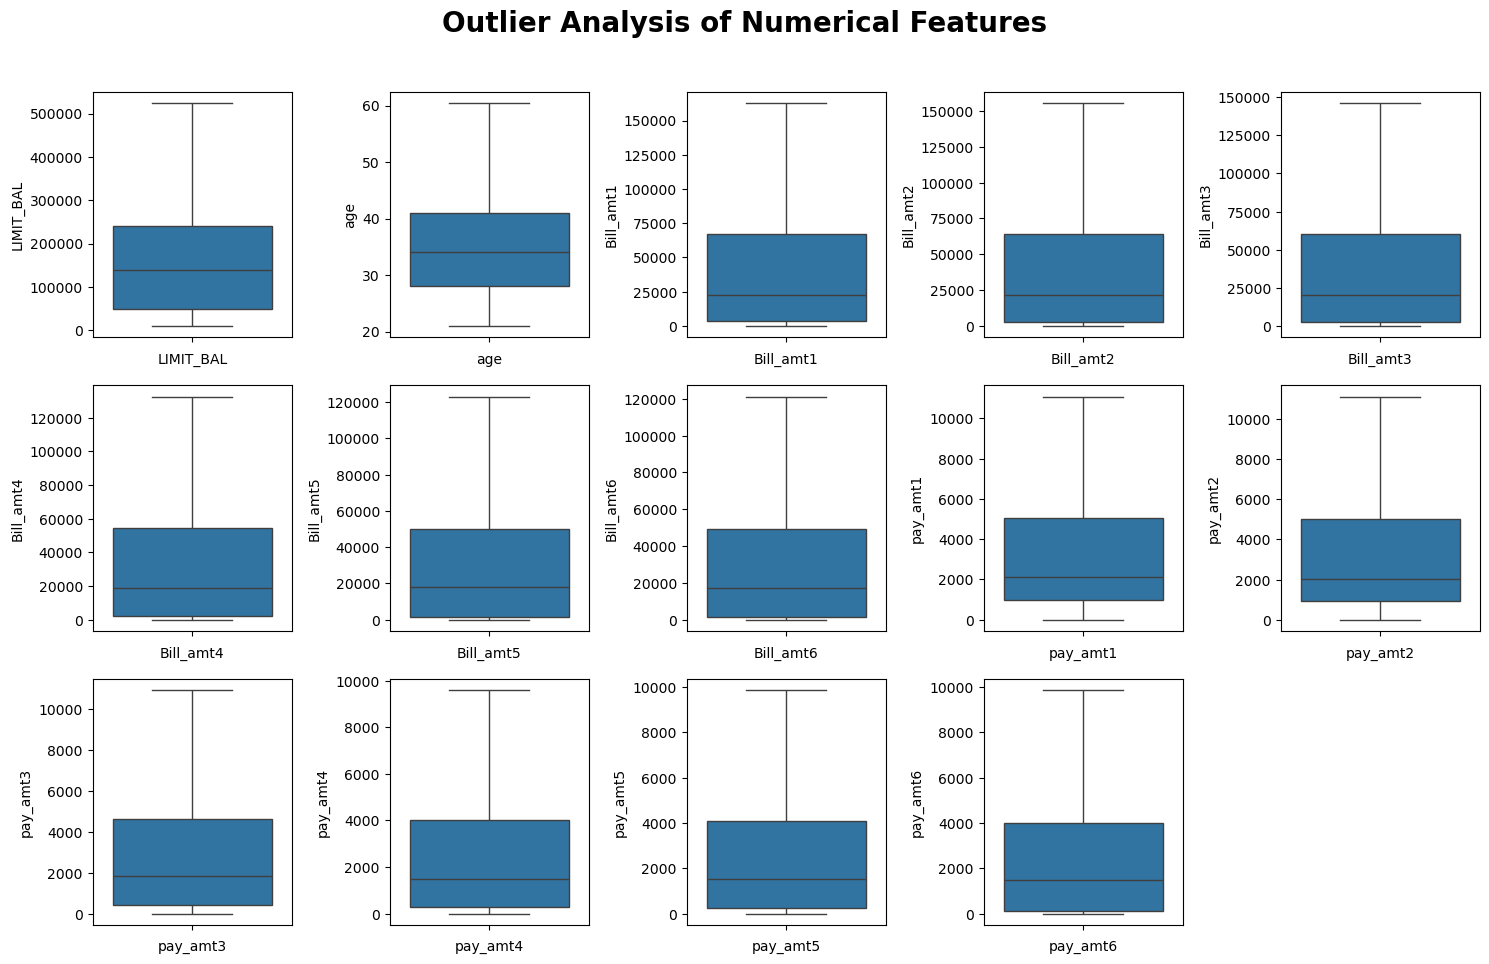

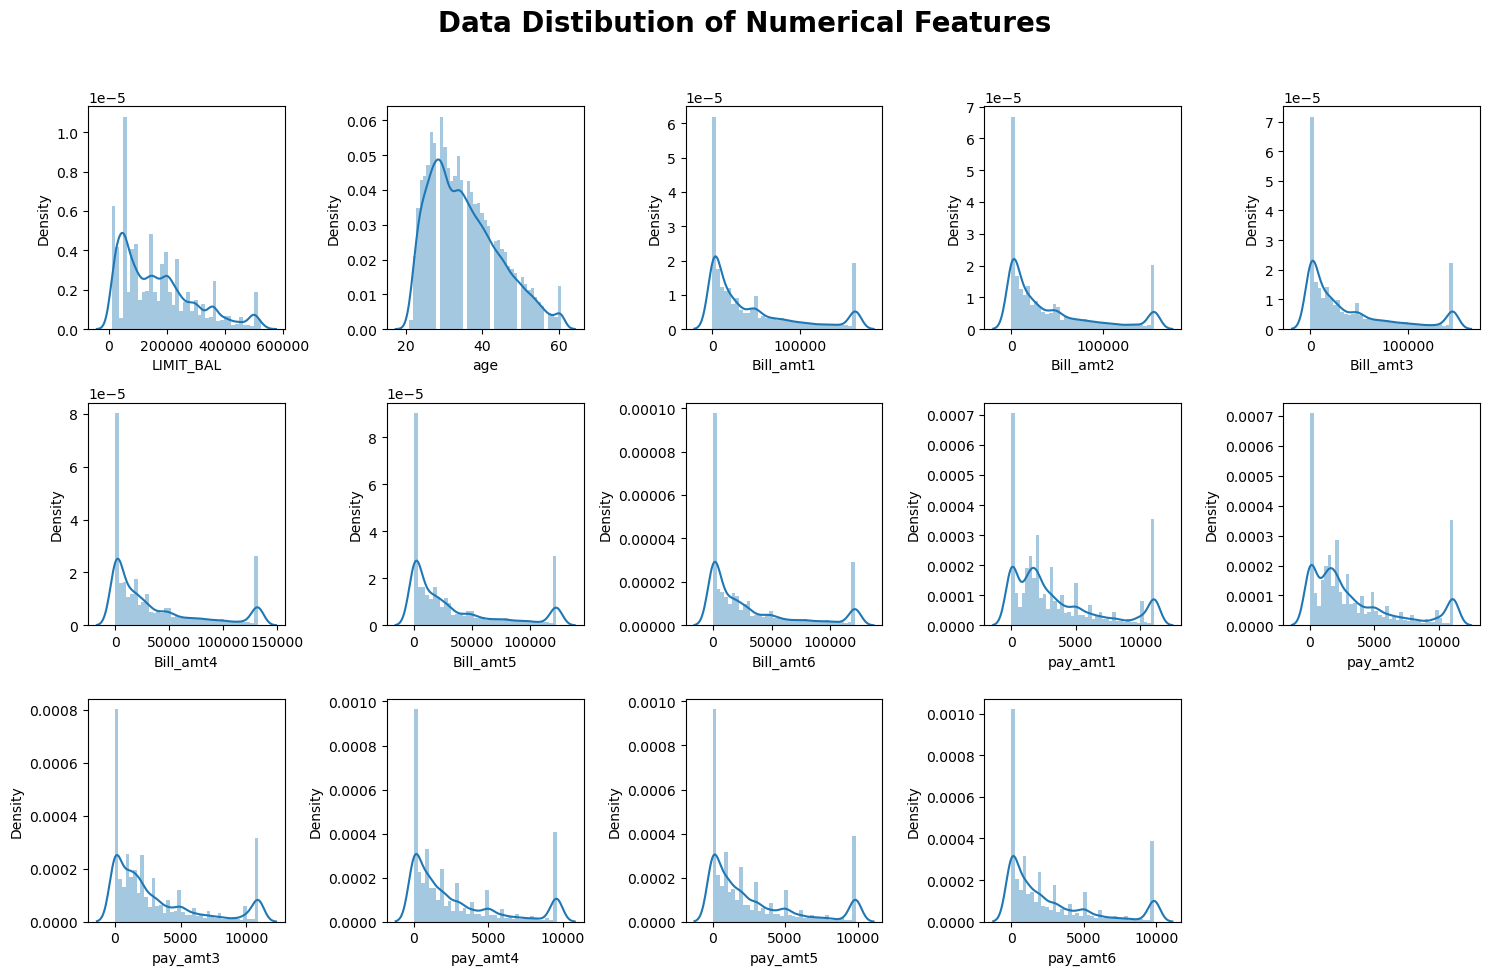

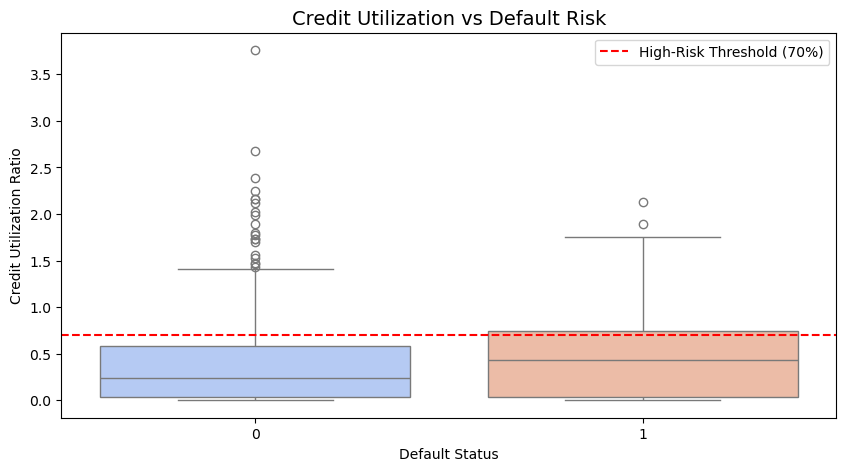

Default Rate for Customers >70% Utilization: 27.41%


In [ ]:
# Credit utilization ratio
df['credit_utilization'] = df['AVG_Bill_amt'] / df['LIMIT_BAL']

# Plotting
plt.figure(figsize=(10, 5))
sns.boxplot(x='next_month_default', y='credit_utilization', data=df, palette='coolwarm')
plt.title('Credit Utilization vs Default Risk', fontsize=14)
plt.xlabel('Default Status')
plt.ylabel('Credit Utilization Ratio')
plt.axhline(y=0.7, color='r', linestyle='--', label='High-Risk Threshold (70%)')
plt.legend()
plt.show()

# High-utilization default rate
high_util_default = df[df['credit_utilization'] > 0.7]['next_month_default'].mean() * 100
print(f"Default Rate for Customers >70% Utilization: {high_util_default:.2f}%")

In [ ]:
df_val['credit_utilization'] = df_val['AVG_Bill_amt'] / df['LIMIT_BAL']

# Payment delay trends by Months

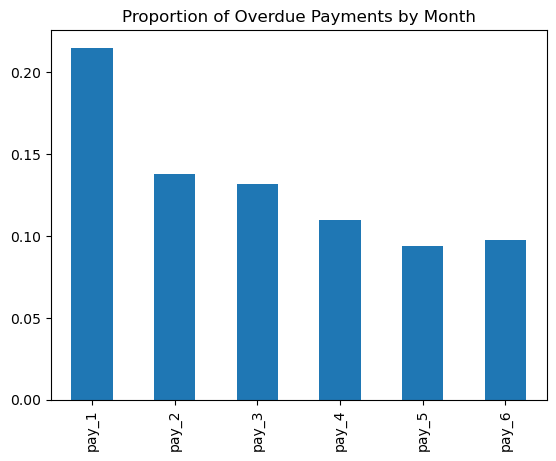

In [ ]:
pay_status = df[[f'pay_{i}' for i in range(1,7)]].apply(lambda x: x >= 1).mean()
pay_status.plot(kind='bar', title='Proportion of Overdue Payments by Month')
plt.show()

# Default Rate by Delinquency Streak

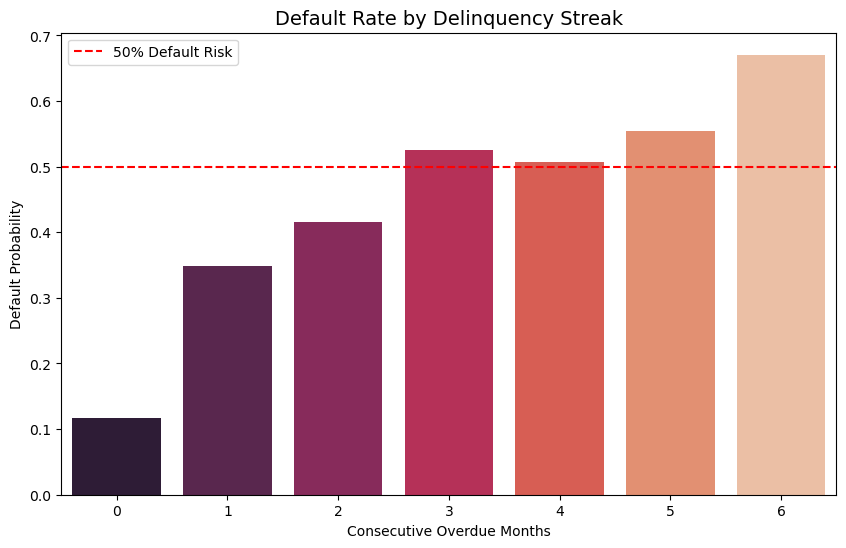

In [ ]:
# Consecutive delinquency streak
def delinquency_streak(row):
    streak = 0
    for m in [f'pay_{i}' for i in range(1,7)]:
        if row[m] >= 1:
            streak += 1
        else:
            break
    return streak

df['delinquency_streak'] = df.apply(delinquency_streak, axis=1)

# Streak vs default rate
streak_default = df.groupby('delinquency_streak')['next_month_default'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='delinquency_streak', y='next_month_default', data=streak_default, palette='rocket')
plt.title('Default Rate by Delinquency Streak', fontsize=14)
plt.xlabel('Consecutive Overdue Months')
plt.ylabel('Default Probability')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Default Risk')
plt.legend()
plt.show()

In [ ]:
df_val['delinquency_streak'] = df_val.apply(delinquency_streak, axis=1)

# Repayment Consistency

In [ ]:
# Payment status columns (Pay_0 = current month, Pay_1 = 1 month ago, etc.)
pay_status_cols = [f'pay_{i}' for i in range(1,7)]

# 1. On-Time Payment Rate (% of months paid fully on time)
df['on_time_rate'] = df[pay_status_cols].apply(
    lambda x: (x == -1).mean(), axis=1)  # -1 = fully paid on time

# 2. Late Payment Rate (% of months with any delay)
df['late_payment_rate'] = df[pay_status_cols].apply(
    lambda x: (x >= 1).mean(), axis=1)  # ≥1 = delayed by X months

# 3. Minimum Payment Habit (% of months paying only minimum)
df['min_payment_rate'] = df[pay_status_cols].apply(
    lambda x: (x == 0).mean(), axis=1)  # 0 = partial/minimum payment

In [ ]:
df_val['on_time_rate'] = df_val[pay_status_cols].apply(
    lambda x: (x == -1).mean(), axis=1)  # -1 = fully paid on time

# 2. Late Payment Rate (% of months with any delay)
df_val['late_payment_rate'] = df_val[pay_status_cols].apply(
    lambda x: (x >= 1).mean(), axis=1)  # ≥1 = delayed by X months

# 3. Minimum Payment Habit (% of months paying only minimum)
df_val['min_payment_rate'] = df_val[pay_status_cols].apply(
    lambda x: (x == 0).mean(), axis=1)  # 0 = partial/minimum payment

In [ ]:
# 4. Consecutive Late Payments (Max streak)
def max_late_streak(row):
    streak = 0
    max_streak = 0
    for m in pay_status_cols:
        if row[m] >= 1:  # Delayed payment
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

df['max_late_streak'] = df.apply(max_late_streak, axis=1)

# 5. Payment Behavior Categories
conditions = [
    (df['on_time_rate'] >= 0.8),
    (df['min_payment_rate'] >= 0.5),
    (df['max_late_streak'] >= 2)
]
choices = ['Consistent Payer', 'Minimum Payment User', 'Chronic Late Payer']
df['payment_profile'] = np.select(conditions, choices, default='Mixed Behavior')

In [ ]:
df_val['max_late_streak'] = df_val.apply(max_late_streak, axis=1)

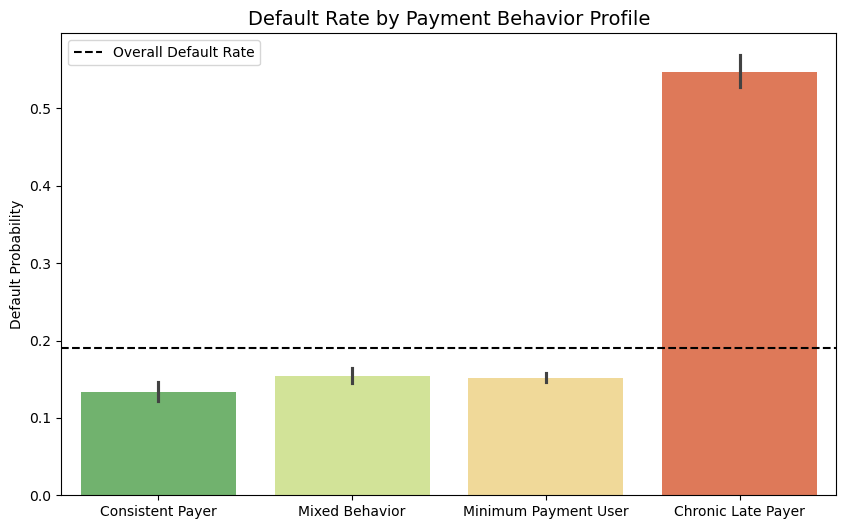

In [ ]:
# Plot default rates by payment profile
plt.figure(figsize=(10, 6))
sns.barplot(
    x='payment_profile',
    y='next_month_default',
    data=df,
    order=['Consistent Payer', 'Mixed Behavior', 'Minimum Payment User', 'Chronic Late Payer'],
    palette='RdYlGn_r'
)
plt.title('Default Rate by Payment Behavior Profile', fontsize=14)
plt.xlabel('')
plt.ylabel('Default Probability')
plt.axhline(y=df['next_month_default'].mean(), color='k', linestyle='--', label='Overall Default Rate')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'next_month_default', 'AVG_Bill_amt', 'Total_Bill', 'Total_Pay',
       'PAY_TO_BILL_ratio', 'credit_utilization', 'delinquency_streak',
       'on_time_rate', 'late_payment_rate', 'min_payment_rate',
       'max_late_streak', 'payment_profile'],
      dtype='object')

In [ ]:
df_val.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'Total_Bill', 'Total_Pay', 'PAY_TO_BILL_ratio',
       'credit_utilization', 'delinquency_streak', 'on_time_rate',
       'late_payment_rate', 'min_payment_rate', 'max_late_streak'],
      dtype='object')

In [ ]:
train_df=df # to prevent the original dataset

In [ ]:
train_df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'next_month_default', 'AVG_Bill_amt', 'Total_Bill', 'Total_Pay',
       'PAY_TO_BILL_ratio', 'credit_utilization', 'delinquency_streak',
       'on_time_rate', 'late_payment_rate', 'min_payment_rate',
       'max_late_streak', 'payment_profile'],
      dtype='object')

In [ ]:
train_df = train_df.drop(['payment_profile'], axis=1)
# no use in the model training

In [ ]:
num_features = [ 'LIMIT_BAL', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'
       , 'AVG_Bill_amt', 'Total_Bill', 'Total_Pay',
       'PAY_TO_BILL_ratio', 'credit_utilization', 'delinquency_streak',
       'on_time_rate', 'late_payment_rate', 'min_payment_rate',
       'max_late_streak']
cat_features = ['marriage', 'sex', 'education',]


print(f'Numerical Features : {num_features}')
print(f'Categorical Features : {cat_features}')


Numerical Features : ['LIMIT_BAL', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'Total_Bill', 'Total_Pay', 'PAY_TO_BILL_ratio', 'credit_utilization', 'delinquency_streak', 'on_time_rate', 'late_payment_rate', 'min_payment_rate', 'max_late_streak']
Categorical Features : ['marriage', 'sex', 'education']


In [ ]:
# Check Unique Values for each categorical variable.
for i in cat_features:
  print("No. of unique values in",i,"is",train_df[i].nunique())

No. of unique values in marriage is 3
No. of unique values in sex is 2
No. of unique values in education is 4


In [ ]:
# checking the data type of each feature
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marriage            25247 non-null  int64  
 1   sex                 25247 non-null  int64  
 2   education           25247 non-null  int64  
 3   LIMIT_BAL           25247 non-null  int64  
 4   age                 25247 non-null  float64
 5   pay_1               25247 non-null  int64  
 6   pay_2               25247 non-null  int64  
 7   pay_3               25247 non-null  int64  
 8   pay_4               25247 non-null  int64  
 9   pay_5               25247 non-null  int64  
 10  pay_6               25247 non-null  int64  
 11  Bill_amt1           25247 non-null  float64
 12  Bill_amt2           25247 non-null  float64
 13  Bill_amt3           25247 non-null  float64
 14  Bill_amt4           25247 non-null  float64
 15  Bill_amt5           25247 non-null  float64
 16  Bill

# Correlation Coefficient and Heatmap

The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(train_df[num_features].corr(), annot=True)

<Axes: >

# Feature Selection

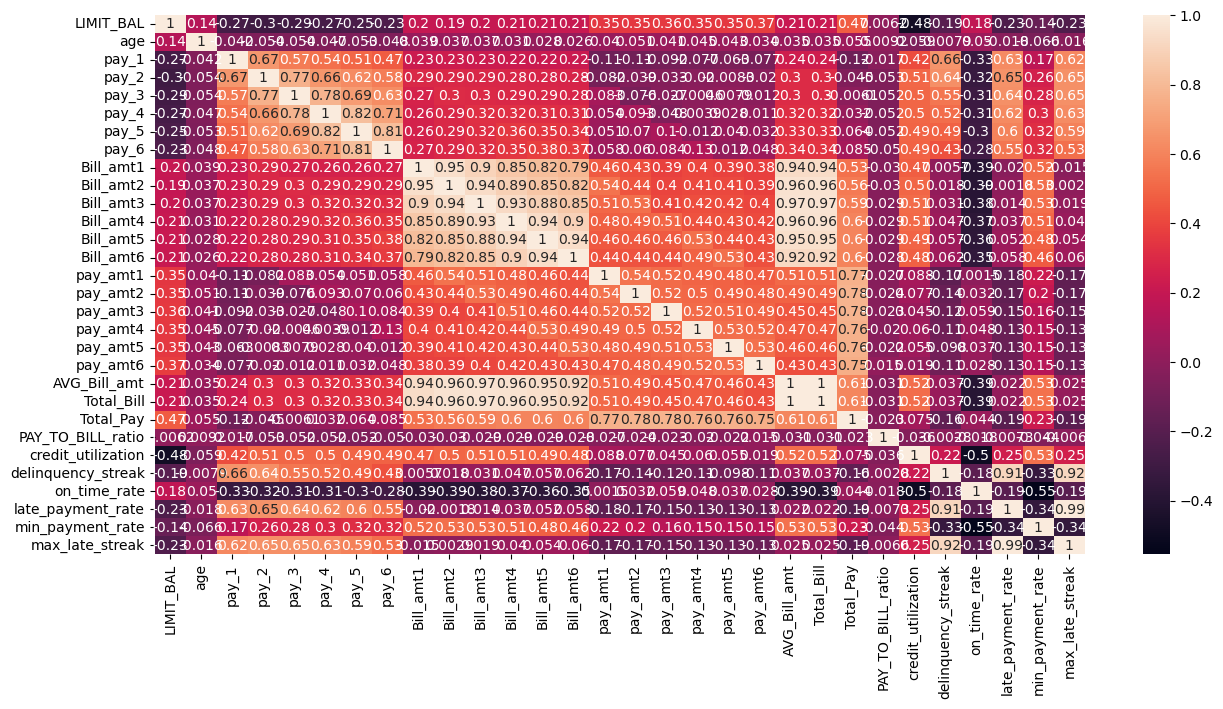

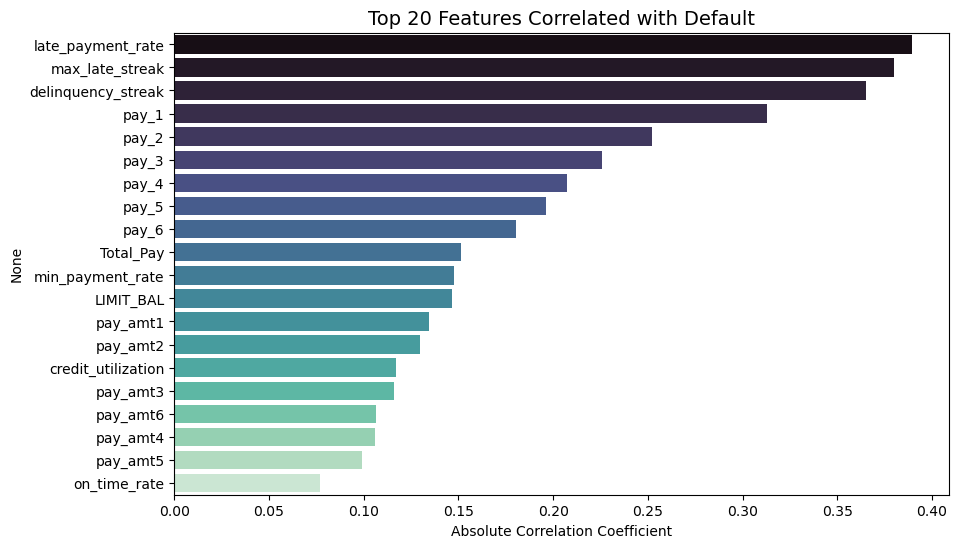

In [ ]:
corr_matrix = train_df.corr()
default_corr = corr_matrix['next_month_default'].abs().sort_values(ascending=False)[1:21]

plt.figure(figsize=(10, 6))
sns.barplot(x=default_corr.values, y=default_corr.index, palette='mako')
plt.title('Top 20 Features Correlated with Default', fontsize=14)
plt.xlabel('Absolute Correlation Coefficient')
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

target_column = 'next_month_default'  # Target Variable

# ==== STEP 1: Separate Features and Target ====
X = train_df.drop(columns=[target_column])
y = train_df[target_column]

# ==== STEP 2: Standard Scaling Numerical Features ====
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_features])

# ==== STEP 3: OneHotEncoding Categorical Features ====
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = ohe.fit_transform(X[cat_features])

# Get OHE feature names
ohe_features = ohe.get_feature_names_out(cat_features)

# ==== STEP 4: Combine Scaled Num + Encoded Cat Features ====
X_processed = np.hstack([X_num_scaled, X_cat_encoded])

processed_feature_names = num_features + list(ohe_features)
X_processed_df = pd.DataFrame(X_processed, columns=processed_feature_names)

# ==== STEP 5: Train-Test Split (BEFORE SMOTE!) ====
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.2, random_state=42, stratify=y
)

print("Shapes before SMOTE:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

# ==== STEP 6: Apply SMOTE on Train Set Only ====
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shapes after SMOTE:")
print("X_train_resampled:", X_train_resampled.shape, "y_train_resampled:", y_train_resampled.shape)
print("X_test (unchanged):", X_test.shape, "y_test:", y_test.shape)


Shapes before SMOTE:
X_train: (20197, 36) X_test: (5050, 36)
Shapes after SMOTE:
X_train_resampled: (32704, 36) y_train_resampled: (32704,)
X_test (unchanged): (5050, 36) y_test: (5050,)


In [ ]:
X_valid = df_val.drop(columns='Customer_ID')  # drops only the target column

scaler = StandardScaler()
X_num_scaled_val = scaler.fit_transform(X_valid[num_features])
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded_val = ohe.fit_transform(X_valid[cat_features])
# ==== STEP 4: Combine Scaled Numerical and Encoded Categorical Features ====
X_processed_val = np.hstack([X_num_scaled_val, X_cat_encoded_val])

# Optionally convert to DataFrame for clarity
processed_feature_names_val = num_features + list(ohe_features)
X_processed_df = pd.DataFrame(X_processed_val, columns=processed_feature_names_val)


# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, classification_report, ConfusionMatrixDisplay, make_scorer
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ==== Threshold Optimizer ====
def find_best_threshold(y_true, y_proba, beta=2):
    thresholds = np.arange(0.0, 1.01, 0.01)
    f2_scores = []
    for t in thresholds:
        preds = (y_proba >= t).astype(int)
        f2 = fbeta_score(y_true, preds, beta=beta)
        f2_scores.append(f2)

    best_index = np.argmax(f2_scores)
    return thresholds[best_index], f2_scores[best_index], thresholds, f2_scores

# ==== Results Storage ====
model_result = []

# ==== Prediction + Evaluation ====
def predict(ml_model, model_name):
    model = ml_model.fit(X_train_resampled, y_train_resampled)

    # Probabilities
    y_train_prob = model.predict_proba(X_train_resampled)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # 🔍 Find best threshold on test set
    best_thresh, best_test_f2, thresholds, f2_scores = find_best_threshold(y_test, y_test_prob, beta=2)
    print(f"📌 Best Threshold (F2): {best_thresh:.2f} → F2 Score: {best_test_f2:.4f}")

    # Plot threshold vs F2 score
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, f2_scores, label='F2 Score', color='blue')
    plt.axvline(best_thresh, linestyle='--', color='red', label=f'Best Threshold: {best_thresh:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('F2 Score')
    plt.title(f'Threshold vs F2 Score ({model_name})')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Final predictions
    y_train_pred = (y_train_prob >= best_thresh).astype(int)
    y_test_pred = (y_test_prob >= best_thresh).astype(int)

    # Evaluation metrics
    metrics = {
        'model': model_name,
        'threshold': best_thresh,
        'train_accuracy': accuracy_score(y_train_resampled, y_train_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision': precision_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred),
        'test_f1': f1_score(y_test, y_test_pred),
        'test_f2': best_test_f2,
        'test_roc_auc': roc_auc_score(y_test, y_test_prob)
    }

    # Print metrics
    print(f"\n📊 Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_test_pred))

    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

    # Actual vs Predicted
    print("🧾 Actual vs Predicted (first 10 rows):")
    print(pd.DataFrame({'y_actual': y_test.values, 'y_predict': y_test_pred}).head(10).T)

    # Append result
    model_result.append(metrics)


Fitting 5 folds for each of 4 candidates, totalling 20 fits

✅ Best Params for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
📌 Best Threshold (F2): 0.40 → F2 Score: 0.5908


<Figure size 800x500 with 0 Axes>

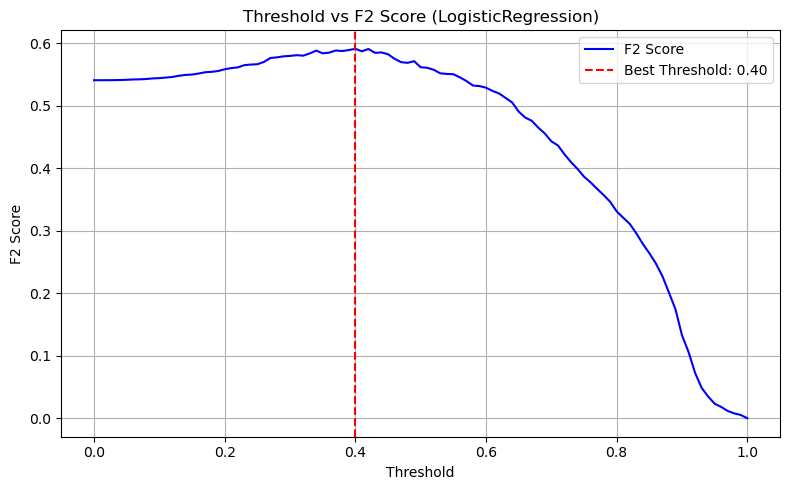


📊 Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.91      0.60      0.73      4088
           1       0.31      0.76      0.44       962

    accuracy                           0.63      5050
   macro avg       0.61      0.68      0.59      5050
weighted avg       0.80      0.63      0.67      5050



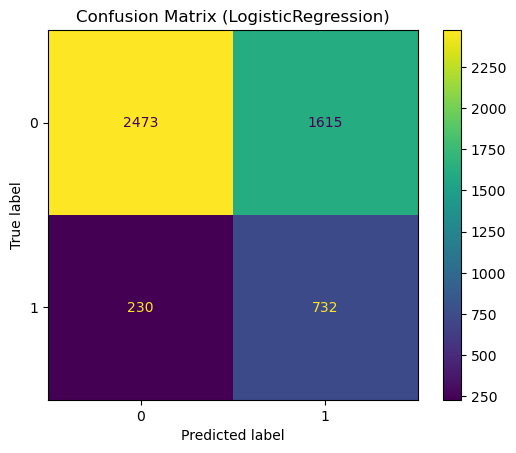

🧾 Actual vs Predicted (first 10 rows):
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  0  1  0  0  0  0  0  1
y_predict  1  0  1  0  1  0  1  1  0  1


In [ ]:
# F2 scorer for tuning
f2_scorer = make_scorer(fbeta_score, beta=2)

# Hyperparameters for Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression(max_iter=500)

logreg_gridsearch = GridSearchCV(
    estimator=logreg,
    param_grid=logreg_params,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

logreg_gridsearch.fit(X_train, y_train)

optimal_model_log = logreg_gridsearch.best_estimator_
print("\n✅ Best Params for Logistic Regression:", logreg_gridsearch.best_params_)

# Evaluate model
predict(optimal_model_log, 'LogisticRegression')



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
📌 Best Threshold (F2): 0.30 → F2 Score: 0.5907


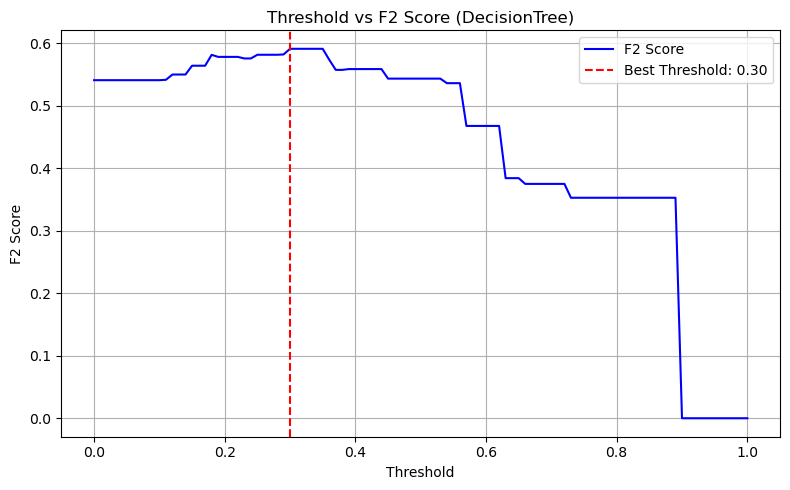


📊 Classification Report for DecisionTree:

              precision    recall  f1-score   support

           0       0.92      0.55      0.69      4088
           1       0.29      0.79      0.43       962

    accuracy                           0.60      5050
   macro avg       0.61      0.67      0.56      5050
weighted avg       0.80      0.60      0.64      5050



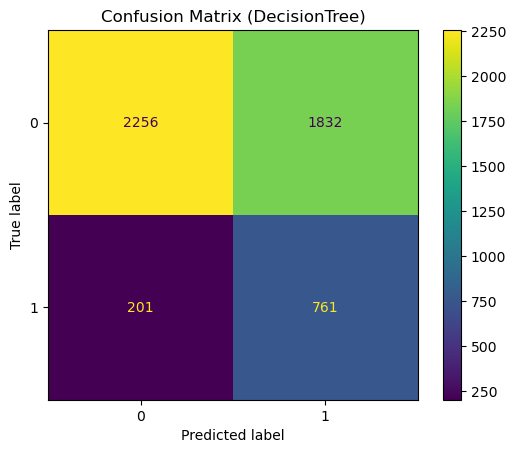

🧾 Actual vs Predicted (first 10 rows):
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  0  1  0  0  0  0  0  1
y_predict  0  0  0  0  1  0  1  1  0  1


In [ ]:
# =======================
# 🌲 Decision Tree
# =======================
dt_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

dt = DecisionTreeClassifier(random_state=42)
dt_gridsearch = GridSearchCV(
    dt,
    dt_params,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)
dt_gridsearch.fit(X_train, y_train)
optimal_model_ds = dt_gridsearch.best_estimator_

print("Best Params for Decision Tree:", dt_gridsearch.best_params_)
predict(optimal_model_ds, 'DecisionTree')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Params for Random Forest: {'max_depth': 70, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best F2 Score (CV): 0.36552567831356975
📌 Best Threshold (F2): 0.22 → F2 Score: 0.5937


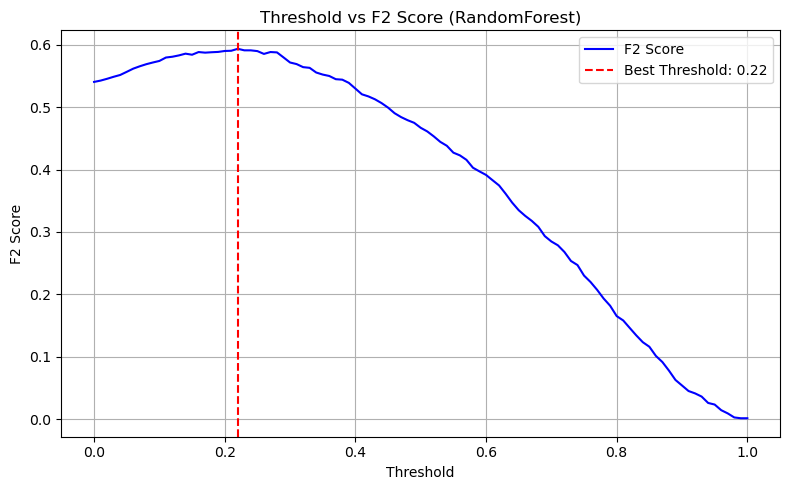


📊 Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.92      0.55      0.69      4088
           1       0.29      0.80      0.43       962

    accuracy                           0.60      5050
   macro avg       0.61      0.67      0.56      5050
weighted avg       0.80      0.60      0.64      5050



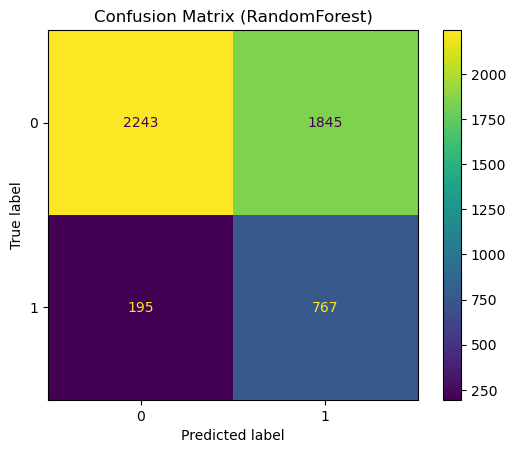

🧾 Actual vs Predicted (first 10 rows):
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  0  1  0  0  0  0  0  1
y_predict  1  0  0  0  1  1  1  1  0  1


In [ ]:
# =======================
# 🌳 Random Forest
# =======================
rf_params = {
    'n_estimators': [50, 75],
    'max_depth': [70, 80],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [3, 4]
}

rf = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring=f2_scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)
rf_gridsearch.fit(X_train, y_train)
optimal_model_rf = rf_gridsearch.best_estimator_

print("Best Params for Random Forest:", rf_gridsearch.best_params_)
print("Best F2 Score (CV):", rf_gridsearch.best_score_)
predict(optimal_model_rf, 'RandomForest')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 75}
📌 Best Threshold (F2): 0.21 → F2 Score: 0.6039


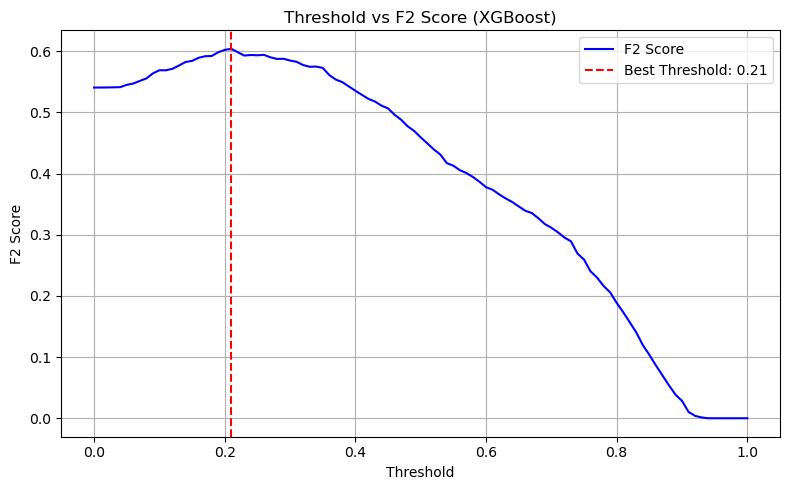


📊 Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.92      0.56      0.70      4088
           1       0.30      0.81      0.44       962

    accuracy                           0.61      5050
   macro avg       0.61      0.68      0.57      5050
weighted avg       0.81      0.61      0.65      5050



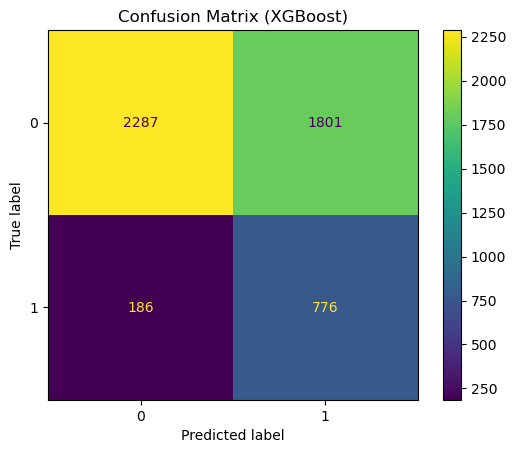

🧾 Actual vs Predicted (first 10 rows):
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  0  1  0  0  0  0  0  1
y_predict  1  0  0  0  1  0  0  1  0  1


In [ ]:
# ==== Hyperparameter Tuning ====
xgb_params = {
    'n_estimators': [75, 100],
    'max_depth': [6, 9],
    'min_samples_split': [5, 7],
    'min_samples_leaf': [6, 8],
    'learning_rate': [0.1]
}

# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # avoid warning
xgb_gridsearch = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring=f2_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Train model with Grid Search
xgb_gridsearch.fit(X_train, y_train)

# Best model
optimal_model_xgb = xgb_gridsearch.best_estimator_
print("Best Params for XGBoost:", xgb_gridsearch.best_params_)

# Evaluate
predict(optimal_model_xgb, 'XGBoost')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 3845, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4546
[LightGBM] [Info] Number of data points in the train set: 20197, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190375 -> initscore=-1.447577
[LightGBM] [Info] Start training from score -1.447577
Best Params for LightGBM: {'max_de

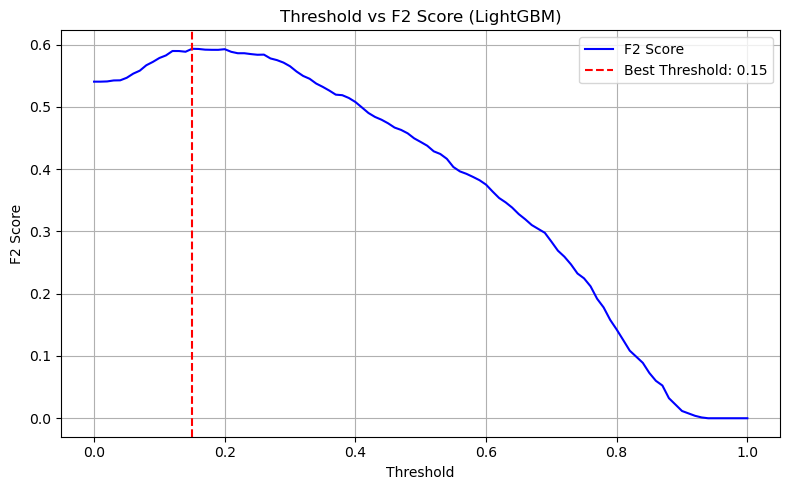


📊 Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.93      0.46      0.62      4088
           1       0.27      0.85      0.41       962

    accuracy                           0.53      5050
   macro avg       0.60      0.65      0.51      5050
weighted avg       0.80      0.53      0.58      5050



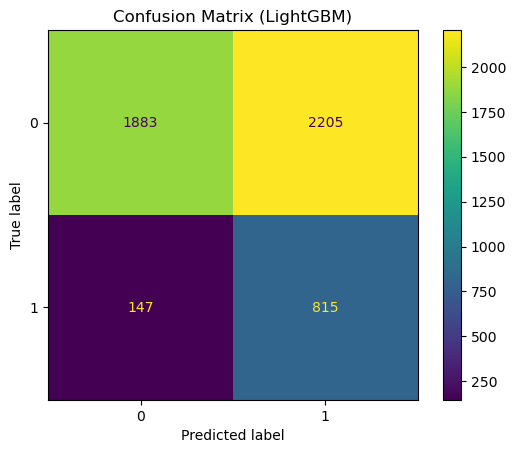

🧾 Actual vs Predicted (first 10 rows):
           0  1  2  3  4  5  6  7  8  9
y_actual   0  0  0  1  0  0  0  0  0  1
y_predict  1  0  1  0  1  1  0  1  0  1


In [ ]:
# =======================
# 💡 LightGBM
# =======================
lgb_params = {
    'n_estimators': [70, 100],
    'max_depth': [7, 9],
    'min_samples_split': [4, 5],
    'min_samples_leaf': [4, 6]
}

lgb = LGBMClassifier(objective='binary')
lgb_gridsearch = GridSearchCV(
    estimator=lgb,
    param_grid=lgb_params,
    scoring=f2_scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)
lgb_gridsearch.fit(X_train, y_train)
optimal_model_lgb = lgb_gridsearch.best_estimator_

print("Best Params for LightGBM:", lgb_gridsearch.best_params_)
predict(optimal_model_lgb, 'LightGBM')

In [ ]:
results_df = pd.DataFrame(model_result)
print(results_df)

                model  threshold  train_accuracy  test_accuracy  \
0  LogisticRegression       0.40        0.683647       0.634653   
1        DecisionTree       0.30        0.714928       0.597426   
2        RandomForest       0.22        0.901755       0.596040   
3             XGBoost       0.21        0.768683       0.606535   
4            LightGBM       0.15        0.734039       0.534257   

   test_precision  test_recall   test_f1   test_f2  test_roc_auc  
0        0.311888     0.760915  0.442430  0.590799      0.765359  
1        0.293482     0.791060  0.428129  0.590747      0.750135  
2        0.293645     0.797297  0.429211  0.593653      0.766959  
3        0.301125     0.806653  0.438542  0.603891      0.772255  
4        0.269868     0.847193  0.409342  0.593331      0.770789  


In order to avoid false negatives, we need to minimize situations where the model predicts that a customer will not default, when in reality, they do. Similarly, to minimize false positives, we need to increase the precision and recall scores, which will positively impact the f1_score( which is here f2 score). In our scenario, recall should take precedence over precision. Hence, we should aim for moderate f1_score and high recall scores. As a result, the model's recall score will be the primary focus of our project.

Balanced accuracy is a better metric than F1 when positives and negatives are equally important. When more attention is required, F1 is an excellent scoring metric for imbalanced data.

In [ ]:
results_df[['model','test_f2']]

,model,test_f2
0,LogisticRegression,0.590799
1,DecisionTree,0.590747
2,RandomForest,0.593653
3,XGBoost,0.603891
4,LightGBM,0.593331


In [ ]:
# feature importance (Random Forest)
rf_importances = rf_gridsearch.best_estimator_.feature_importances_

#Creating a dictonary
rf_importance_dict = {'Feature RF' : list(X_train.columns),
                   'Feature Importance RF' : rf_importances}

#Creating the dataframe
rf_importance = pd.DataFrame(rf_importance_dict)
rf_sorting_features = rf_importance.sort_values(by=['Feature Importance RF'],ascending=False)

# feature importance (XGB)
xgb_importances = xgb_gridsearch.best_estimator_.feature_importances_

#Creating a dictonary
xgb_importance_dict = {'Feature XGB' : list(X_train.columns),
                   'Feature Importance XGB' : xgb_importances}

#Creating the dataframe
xgb_importance = pd.DataFrame(xgb_importance_dict)
xgb_sorting_features = xgb_importance.sort_values(by=['Feature Importance XGB'],ascending=False)


# feature importance (LGB)
lgb_importances = lgb_gridsearch.best_estimator_.feature_importances_

#Creating a dictonary
lgb_importance_dict = {'Feature LGB' : list(X_train.columns),
                   'Feature Importance LGB' : lgb_importances}

#Creating the dataframe
lgb_importance = pd.DataFrame(lgb_importance_dict)
lgb_sorting_features = lgb_importance.sort_values(by=['Feature Importance LGB'],ascending=False)

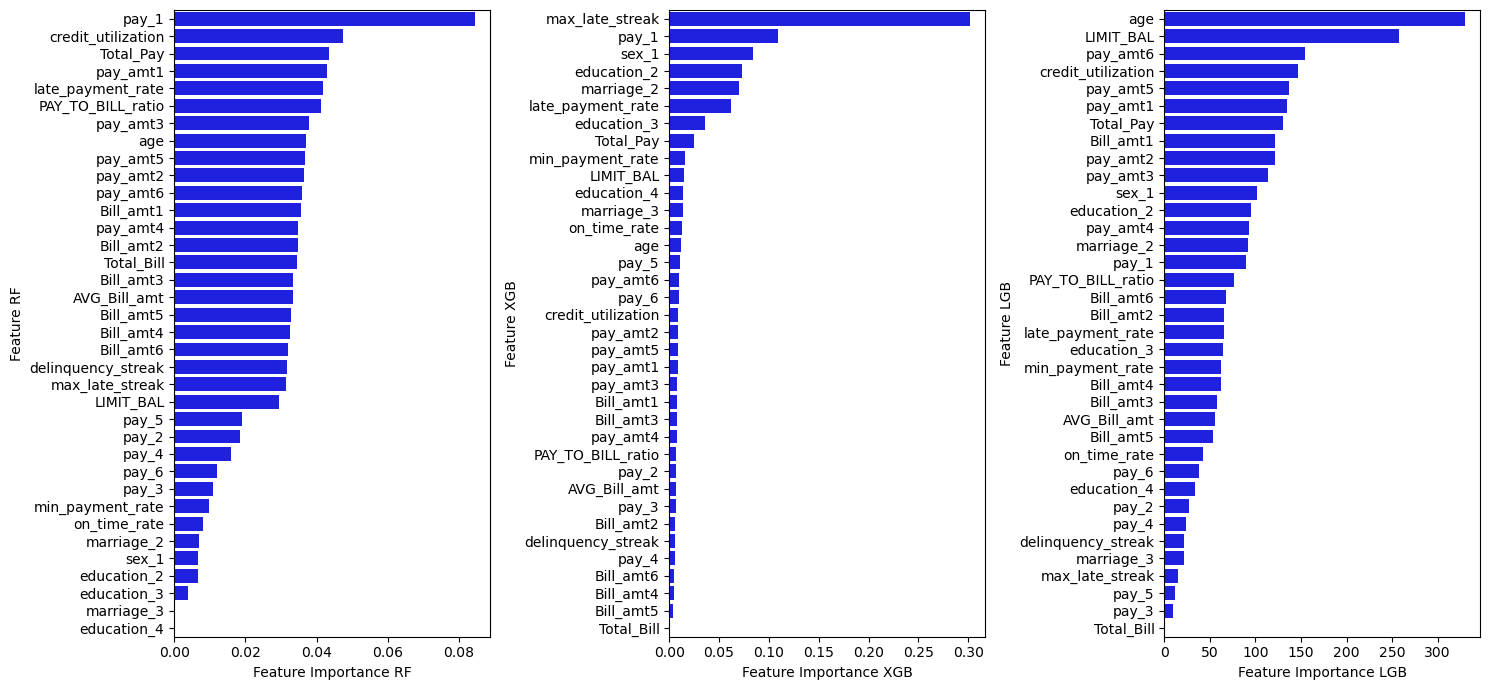

In [ ]:
# plotting feature importance graph
fig,ax = plt.subplots(1,3, figsize=(15,7))
bar = sns.barplot(x='Feature Importance RF', y='Feature RF', data=rf_sorting_features, color='blue', ax=ax[0])
bar = sns.barplot(x='Feature Importance XGB', y='Feature XGB', data=xgb_sorting_features, color='blue', ax=ax[1])
bar = sns.barplot(x='Feature Importance LGB', y='Feature LGB', data=lgb_sorting_features, color='blue', ax=ax[2])

plt.tight_layout()
plt.show()

In [ ]:

def predict_val(ml_model, model_name):

    # Model fitting
    model = ml_model.fit(X_train, y_train)
    # Predict on Validation Data
    y_valid_pred = model.predict(X_processed_df)
    return  y_valid_pred





In [ ]:

y_vaild_predictions_rf = predict_val(optimal_model_rf, 'random Forest') # predicting the output of the validation data

In [ ]:


result_df = pd.DataFrame({
    'Customer_ID': df_val['Customer_ID'].values,
    'Prediction': y_vaild_predictions_rf
})



In [ ]:
result_df['Prediction'].mean()*100 # default percent in the validation data set

9.808612440191387

In [ ]:
# Save to CSV
result_df.to_csv('submission_23112106.csv', index=False)